<a href="https://colab.research.google.com/github/V3ct4r31/Mi_analisisAlura_challenge1/blob/main/notebooks/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#Preparación inicial de Datos para Análisis

In [ ]:
# --- Paso 1: Añadir la columna 'nombre_tienda' a cada DataFrame ---
# Esto es para poder diferenciar los datos por tienda después de la concatenación.
tienda['nombre_tienda'] = 'Tienda 1'
tienda2['nombre_tienda'] = 'Tienda 2'
tienda3['nombre_tienda'] = 'Tienda 3'
tienda4['nombre_tienda'] = 'Tienda 4'

# --- Paso 2: Concatenar los DataFrames en uno solo (df_aluras) ---
# Usamos pd.concat para unir todos los DataFrames.
# ignore_index=True es importante para resetear el índice y evitar duplicados de índice de las tiendas originales.
df_aluras = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# --- Paso 3: Convertir la columna 'Fecha de Compra' a formato de fecha ---
# Esto es para poder realizar análisis temporales, y asegura el tipo de dato correcto.
df_aluras['Fecha de Compra'] = pd.to_datetime(df_aluras['Fecha de Compra'])

# --- Paso 4: Calcular la columna 'Ingreso Total' ---
# Esta es una métrica clave para un análisis financiero.
df_aluras['Ingreso Total'] = df_aluras['Precio'] + df_aluras['Costo de envío']

# --- Verificación (opcional) ---
# Después de todas estas transformaciones, es bueno verificar cómo se ve el DataFrame final.
print("\nPrimeras filas del DataFrame combinado (df_aluras):")
df_aluras.head()

print("\nInformación general del DataFrame combinado (df_aluras):")
df_aluras.info()

print("\nEstadísticas descriptivas del DataFrame combinado (df_aluras):")
df_aluras.describe()


Primeras filas del DataFrame combinado (df_aluras):

Información general del DataFrame combinado (df_aluras):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Producto                9435 non-null   object        
 1   Categoría del Producto  9435 non-null   object        
 2   Precio                  9435 non-null   float64       
 3   Costo de envío          9435 non-null   float64       
 4   Fecha de Compra         9435 non-null   datetime64[ns]
 5   Vendedor                9435 non-null   object        
 6   Lugar de Compra         9435 non-null   object        
 7   Calificación            9435 non-null   int64         
 8   Método de pago          9435 non-null   object        
 9   Cantidad de cuotas      9435 non-null   int64         
 10  lat                     9435 non-null   float64       
 1

<ipython-input-2-1889093489>:17: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_aluras['Fecha de Compra'] = pd.to_datetime(df_aluras['Fecha de Compra'])


,Precio,Costo de envío,Fecha de Compra,Calificación,Cantidad de cuotas,lat,lon,Ingreso Total
count,9.435000e+03,9435.000000,9435,9435.000000,9435.000000,9435.000000,9435.000000,9.435000e+03
mean,4.667323e+05,24875.145734,2021-08-16 07:36:48.076311808,4.014520,2.927398,5.428909,-74.760108,4.916074e+05
min,7.600000e+03,0.000000,2020-01-01 00:00:00,1.000000,1.000000,-4.215280,-77.281110,7.600000e+03
25%,5.520000e+04,3000.000000,2020-10-27 00:00:00,3.000000,1.000000,4.609710,-75.563590,5.815000e+04
50%,2.215000e+05,11700.000000,2021-08-22 00:00:00,5.000000,1.000000,4.609710,-74.199040,2.331000e+05
75%,6.633000e+05,34900.000000,2022-06-04 12:00:00,5.000000,4.000000,6.251840,-74.081750,6.986500e+05
max,2.977000e+06,162500.000000,2023-03-31 00:00:00,5.000000,24.000000,11.544440,-67.923900,3.135800e+06
std,5.903207e+05,31480.036346,NaN,1.390518,2.802776,2.355663,1.207155,6.217323e+05


#1. Análisis de facturación



--- 1. Análisis de Facturación General ---

Ingresos Totales por Tienda:
nombre_tienda
Tienda 1    $1,212,258,300
Tienda 2    $1,175,828,600
Tienda 3    $1,156,536,200
Tienda 4    $1,093,693,100
Name: Ingreso Total, dtype: object


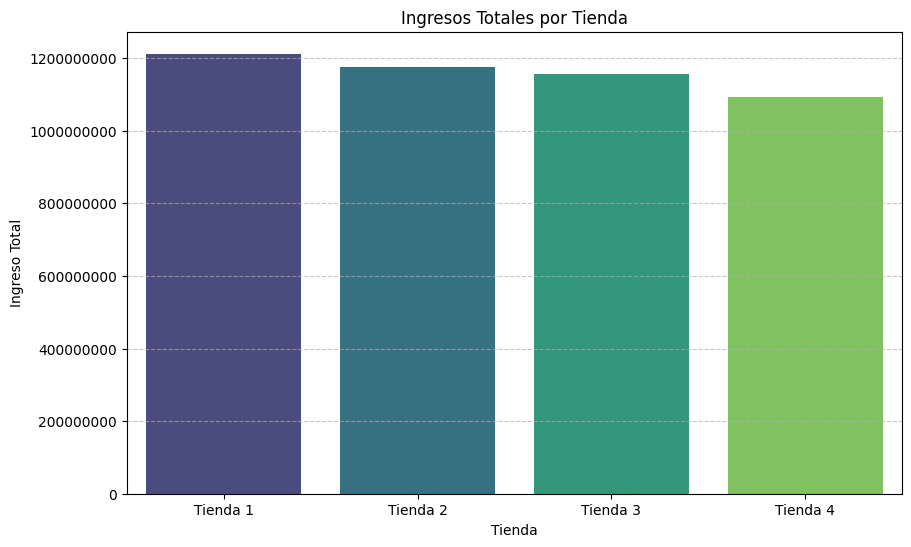


Número de ventas (transacciones) por tienda:
nombre_tienda
Tienda 1    2359
Tienda 2    2359
Tienda 3    2359
Tienda 4    2358
Name: count, dtype: int64


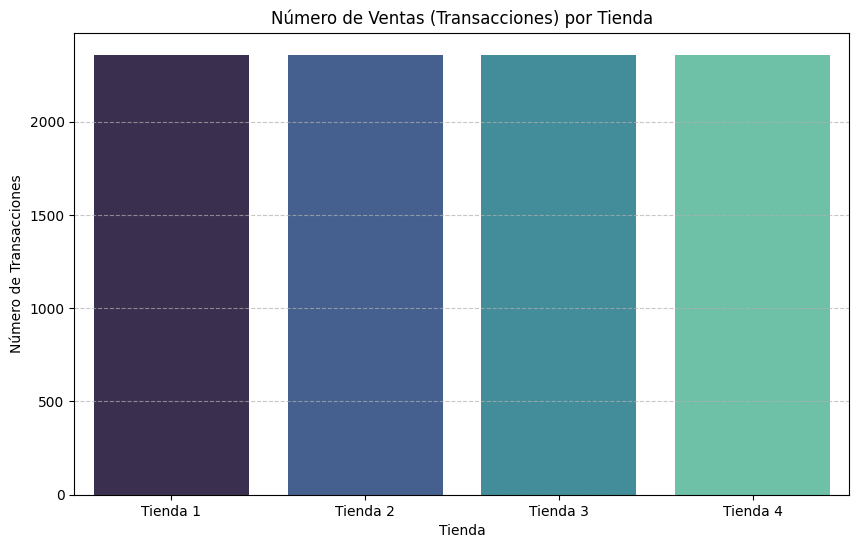

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para evitar advertencias de FutureWarning en seaborn
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# --- 1. Análisis de facturación (Ingresos Totales por Tienda y Número de Ventas) ---

print("--- 1. Análisis de Facturación General ---")

# Cálculo de Ingresos Totales por Tienda
ingresos_por_tienda = df_aluras.groupby('nombre_tienda')['Ingreso Total'].sum().sort_values(ascending=False)
print("\nIngresos Totales por Tienda:")
print(ingresos_por_tienda.apply(lambda x: f"${x:,.0f}")) # Formato de moneda para mejor lectura

# Visualización de Ingresos Totales por Tienda
plt.figure(figsize=(10, 6))
sns.barplot(x=ingresos_por_tienda.index, y=ingresos_por_tienda.values, palette='viridis', hue=ingresos_por_tienda.index, legend=False)
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingreso Total')
plt.ticklabel_format(style='plain', axis='y') # Evita notación científica en el eje Y
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Cálculo de Número de Ventas (Transacciones) por Tienda
ventas_por_tienda = df_aluras['nombre_tienda'].value_counts().sort_values(ascending=False)
print("\nNúmero de ventas (transacciones) por tienda:")
print(ventas_por_tienda)

# Visualización de Número de Ventas por Tienda
plt.figure(figsize=(10, 6))
sns.barplot(x=ventas_por_tienda.index, y=ventas_por_tienda.values, palette='mako', hue=ventas_por_tienda.index, legend=False)
plt.title('Número de Ventas (Transacciones) por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Número de Transacciones')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Ventas por categoría


--- 2. Ventas por Categoría ---

Top 5 Categorías de Productos más vendidas (Global):
Categoría del Producto
Muebles                 1886
Electrónicos            1772
Juguetes                1290
Electrodomésticos       1149
Deportes y diversión    1113
Name: count, dtype: int64


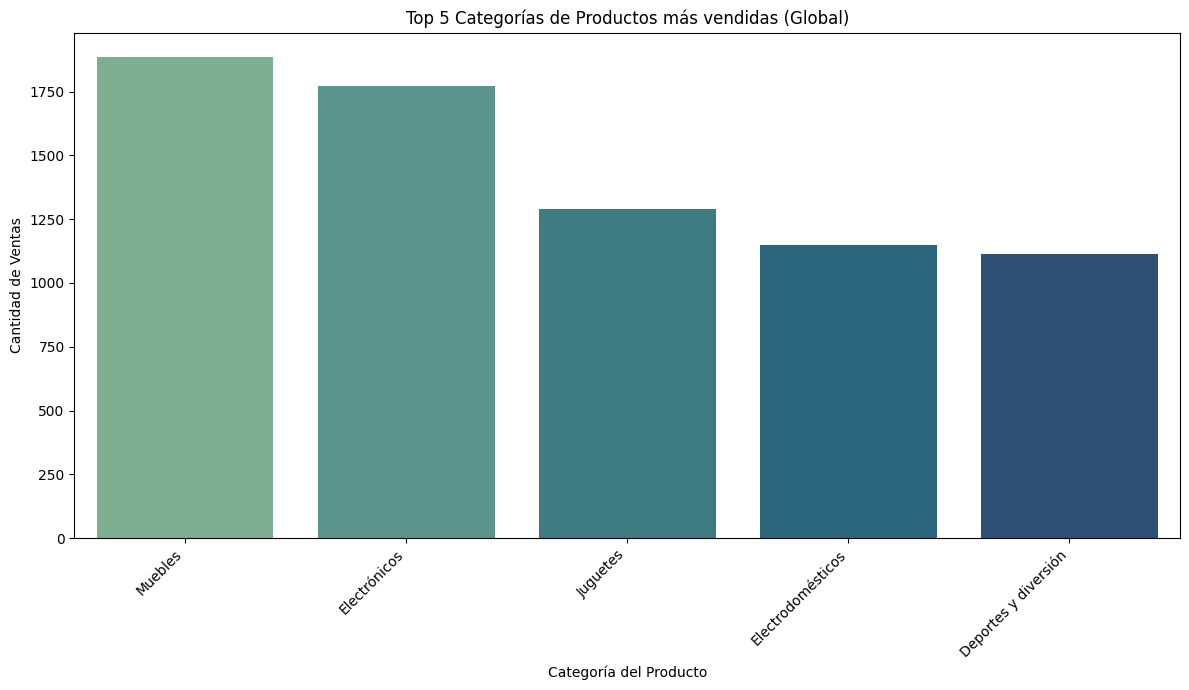


Top 3 Categorías de Productos más vendidas por Tienda:

--- Tienda 1 ---
Categoría del Producto
Muebles         465
Electrónicos    448
Juguetes        324
Name: count, dtype: int64

--- Tienda 2 ---
Categoría del Producto
Muebles         442
Electrónicos    422
Juguetes        313
Name: count, dtype: int64

--- Tienda 3 ---
Categoría del Producto
Muebles         499
Electrónicos    451
Juguetes        315
Name: count, dtype: int64

--- Tienda 4 ---
Categoría del Producto
Muebles         480
Electrónicos    451
Juguetes        338
Name: count, dtype: int64


In [ ]:
# --- 2. Ventas por categoría (Top 5 Global y Top 3 por Tienda) ---

print("\n--- 2. Ventas por Categoría ---")

# Top 5 Categorías de Productos más vendidas (Global)
top_5_categorias_global = df_aluras['Categoría del Producto'].value_counts().head(5)
print("\nTop 5 Categorías de Productos más vendidas (Global):")
print(top_5_categorias_global)

# Visualización de Top 5 Categorías Globales
plt.figure(figsize=(12, 7))
sns.barplot(x=top_5_categorias_global.index, y=top_5_categorias_global.values, palette='crest', hue=top_5_categorias_global.index, legend=False)
plt.title('Top 5 Categorías de Productos más vendidas (Global)')
plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Top 3 Categorías de Productos más vendidas por Tienda
print("\nTop 3 Categorías de Productos más vendidas por Tienda:")
for tienda in df_aluras['nombre_tienda'].unique():
    print(f"\n--- {tienda} ---")
    top_3_por_tienda = df_aluras[df_aluras['nombre_tienda'] == tienda]['Categoría del Producto'].value_counts().head(3)
    print(top_3_por_tienda)

# 3. Calificación promedio de la tienda



--- 3. Calificación Promedio de Productos por Categoría ---

Calificación promedio por Categoría del Producto:
Categoría del Producto
Juguetes                   4.070543
Muebles                    4.033934
Electrodomésticos          4.014795
Libros                     4.004043
Instrumentos musicales     4.003984
Electrónicos               3.992664
Deportes y diversión       3.988320
Artículos para el hogar    3.979452
Name: Calificación, dtype: float64


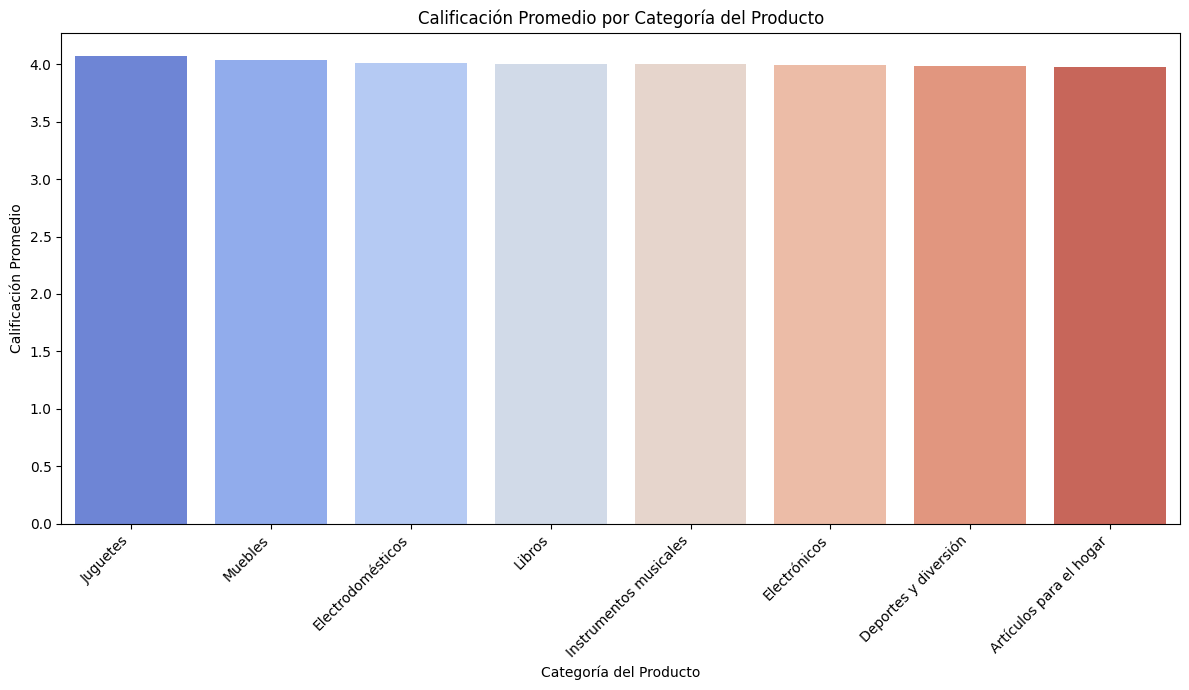

In [ ]:
# --- 3. Calificación promedio de la tienda (por Categoría de Producto) ---

print("\n--- 3. Calificación Promedio de Productos por Categoría ---")

# Calificación promedio por Categoría del Producto
calif_por_categoria = df_aluras.groupby('Categoría del Producto')['Calificación'].mean().sort_values(ascending=False)
print("\nCalificación promedio por Categoría del Producto:")
print(calif_por_categoria)

# Visualización de Calificación Promedio por Categoría
plt.figure(figsize=(12, 7))
sns.barplot(x=calif_por_categoria.index, y=calif_por_categoria.values, palette='coolwarm', hue=calif_por_categoria.index, legend=False)
plt.title('Calificación Promedio por Categoría del Producto')
plt.xlabel('Categoría del Producto')
plt.ylabel('Calificación Promedio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos


--- 4. Productos Más y Menos Vendidos ---

Top 5 Productos más vendidos por cantidad:
Producto
Mesa de noche                210
Carrito de control remoto    206
Microondas                   206
Batería                      203
Cama king                    201
Name: count, dtype: int64


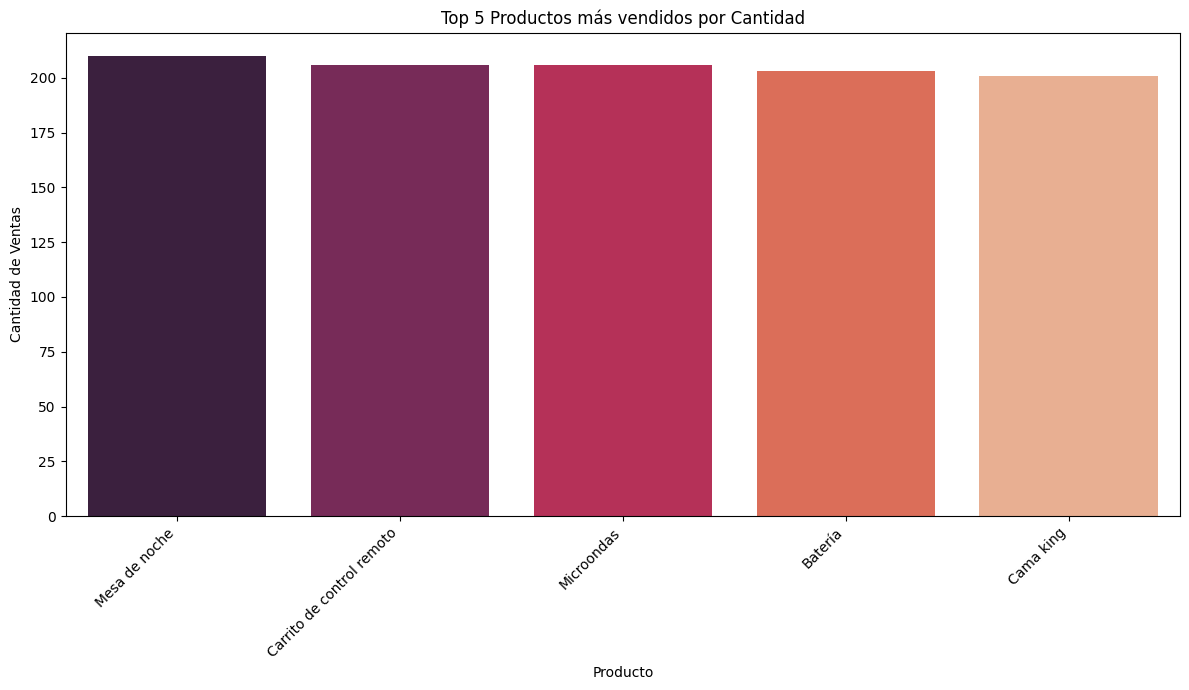


Top 5 Productos que generan más ingresos:
Producto
TV LED UHD 4K       $455,524,500
Iphone 15           $422,445,600
Refrigerador        $405,393,000
Smart TV            $305,662,600
Lavadora de ropa    $255,357,300
Name: Ingreso Total, dtype: object


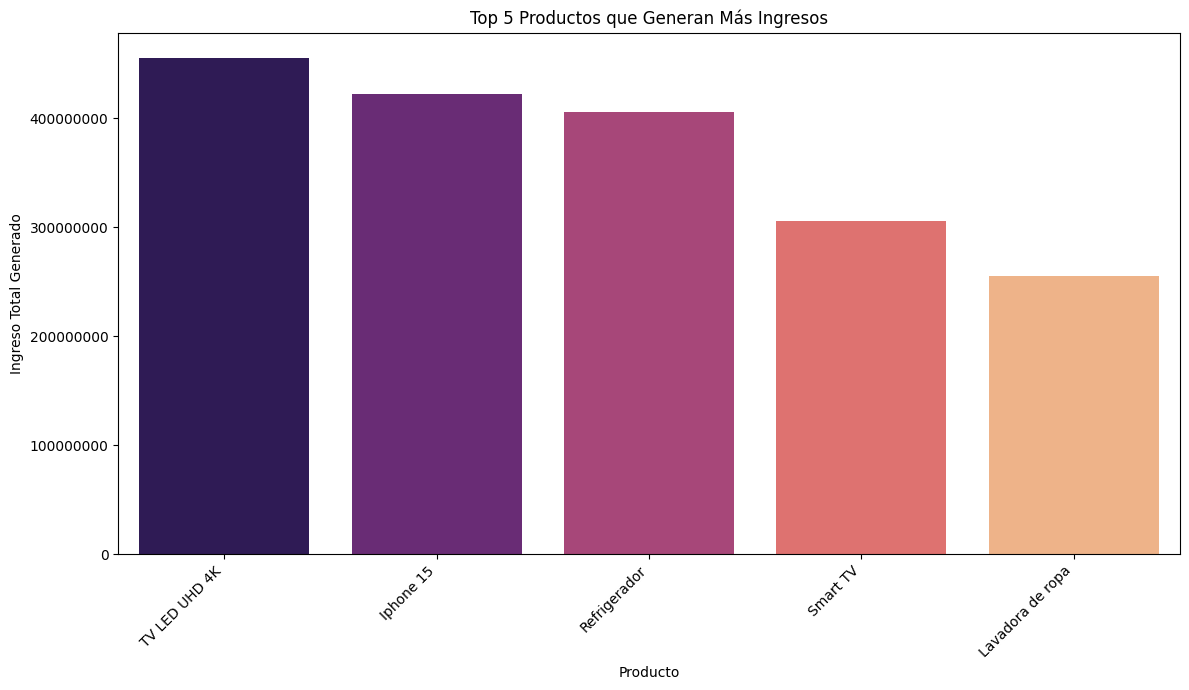

In [ ]:
# --- 4. Productos más y menos vendidos ---

print("\n--- 4. Productos Más y Menos Vendidos ---")

# Top 5 Productos más vendidos por cantidad
top_productos_cantidad = df_aluras['Producto'].value_counts().head(5)
print("\nTop 5 Productos más vendidos por cantidad:")
print(top_productos_cantidad)

# Visualización de Top 5 Productos por Cantidad
plt.figure(figsize=(12, 7))
sns.barplot(x=top_productos_cantidad.index, y=top_productos_cantidad.values, palette='rocket', hue=top_productos_cantidad.index, legend=False)
plt.title('Top 5 Productos más vendidos por Cantidad')
plt.xlabel('Producto')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Top 5 Productos que generan más ingresos
top_productos_ingreso = df_aluras.groupby('Producto')['Ingreso Total'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Productos que generan más ingresos:")
print(top_productos_ingreso.apply(lambda x: f"${x:,.0f}")) # Formato de moneda

# Visualización de Top 5 Productos por Ingreso
plt.figure(figsize=(12, 7))
sns.barplot(x=top_productos_ingreso.index, y=top_productos_ingreso.values, palette='magma', hue=top_productos_ingreso.index, legend=False)
plt.title('Top 5 Productos que Generan Más Ingresos')
plt.xlabel('Producto')
plt.ylabel('Ingreso Total Generado')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y') # Evita notación científica
plt.tight_layout()
plt.show()



# 5. Envío promedio por tienda


--- 5. Costo de Envío Promedio por Categoría ---

Costo de envío promedio global: $24,875.15

Costo de envío promedio por Categoría del Producto:
Categoría del Producto
Electrodomésticos          $61,267.45
Electrónicos               $49,922.18
Instrumentos musicales     $24,574.10
Muebles                    $21,447.72
Deportes y diversión        $6,910.69
Artículos para el hogar     $4,261.78
Juguetes                    $3,117.29
Libros                      $2,776.15
Name: Costo de envío, dtype: object


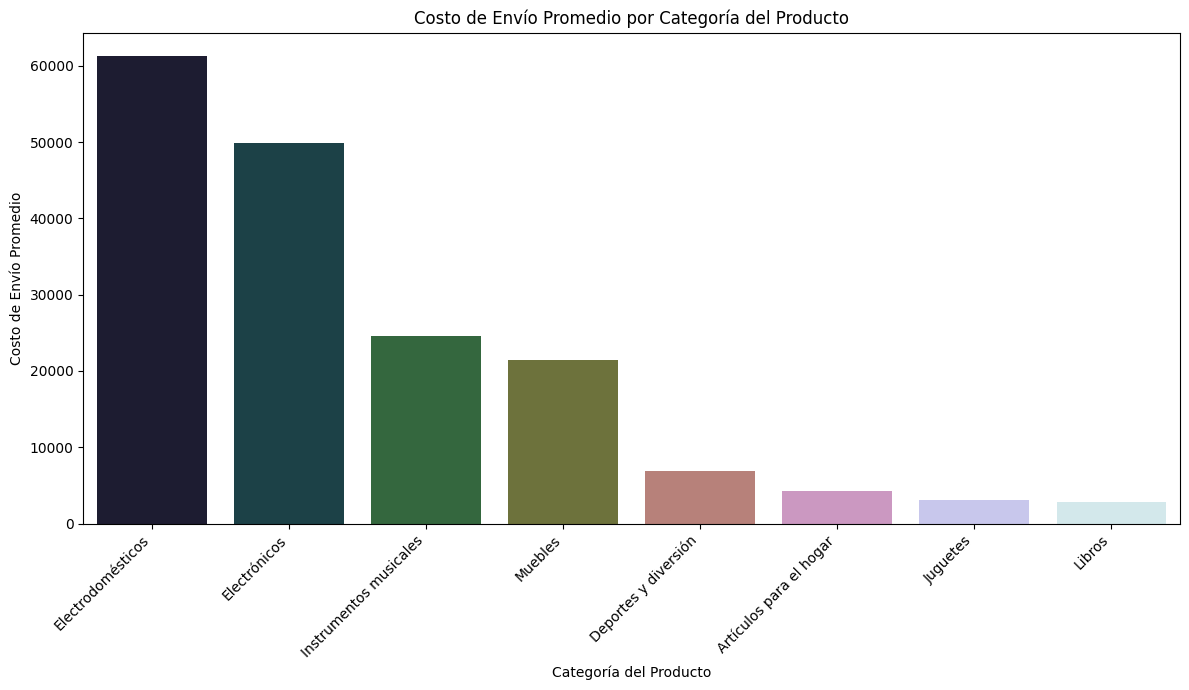

In [ ]:
# --- 5. Envío promedio por categoría (más relevante que por tienda directamente) ---

print("\n--- 5. Costo de Envío Promedio por Categoría ---")

# Costo de envío promedio global
print(f"\nCosto de envío promedio global: ${df_aluras['Costo de envío'].mean():,.2f}")

# Costo de envío promedio por Categoría del Producto
costo_envio_por_categoria = df_aluras.groupby('Categoría del Producto')['Costo de envío'].mean().sort_values(ascending=False)
print("\nCosto de envío promedio por Categoría del Producto:")
print(costo_envio_por_categoria.apply(lambda x: f"${x:,.2f}"))

# Visualización de Costo de Envío Promedio por Categoría
plt.figure(figsize=(12, 7))
sns.barplot(x=costo_envio_por_categoria.index, y=costo_envio_por_categoria.values, palette='cubehelix', hue=costo_envio_por_categoria.index, legend=False)
plt.title('Costo de Envío Promedio por Categoría del Producto')
plt.xlabel('Categoría del Producto')
plt.ylabel('Costo de Envío Promedio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#6. Análisis comparativo: Ingreso Total generado por productos de alto valor


--- ANÁLISIS CLAVE: INEFICIENCIA DE LA TIENDA 4 EN PRODUCTOS DE ALTO VALOR ---

Ingreso Total generado por productos de alto valor, por tienda:
nombre_tienda
Tienda 1    $511,329,400
Tienda 2    $465,688,700
Tienda 3    $448,720,100
Tienda 4    $418,644,800
Name: Ingreso Total, dtype: object


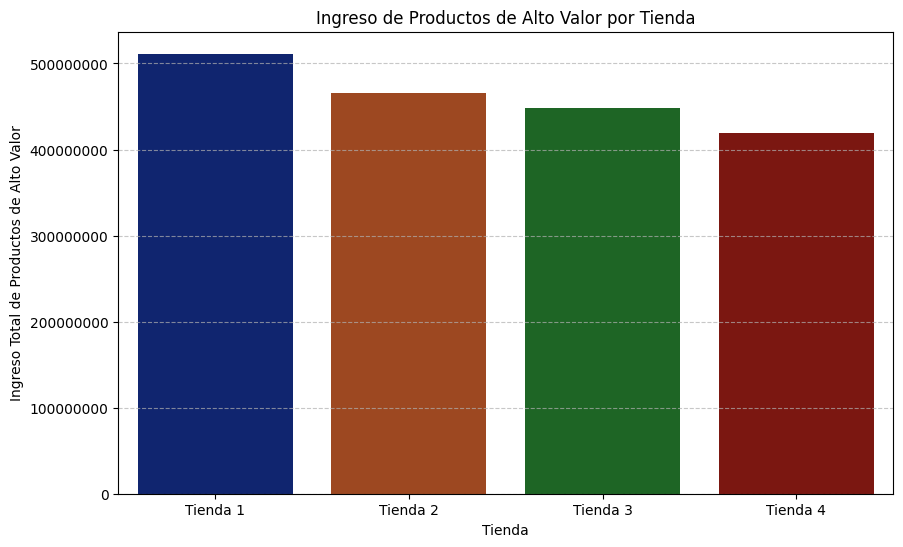


Cantidad de unidades vendidas de productos de alto valor, por tienda:
nombre_tienda
Tienda 1    254
Tienda 2    238
Tienda 3    234
Tienda 4    218
Name: Producto, dtype: int64


Text(0, 0.5, 'Cantidad de Unidades Vendidas')

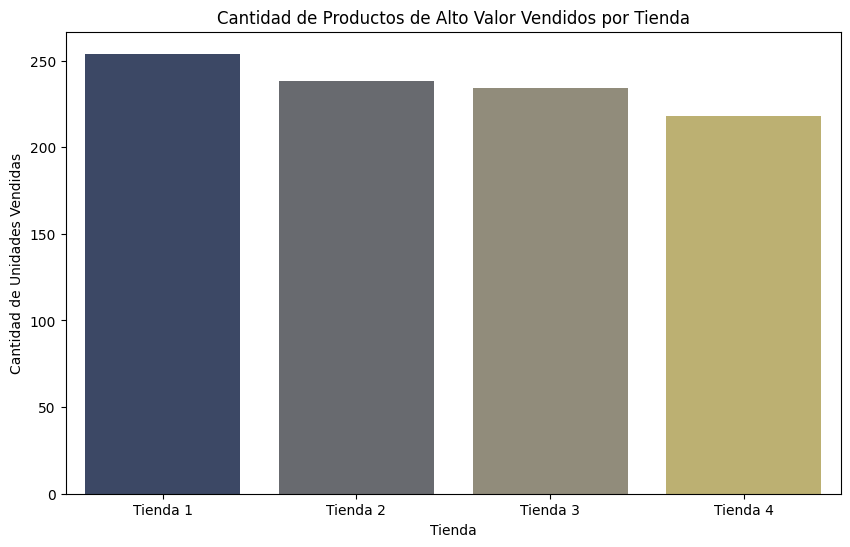

In [ ]:
# --- ANÁLISIS COMPARATIVO CLAVE PARA JUSTIFICAR LA VENTA DE LA TIENDA 4 ---

print("\n--- ANÁLISIS CLAVE: INEFICIENCIA DE LA TIENDA 4 EN PRODUCTOS DE ALTO VALOR ---")

# Definir la lista de productos de alto ingreso (basado en tu análisis anterior)
productos_alto_ingreso = ['TV LED UHD 4K', 'Iphone 15', 'Refrigerador', 'Smart TV', 'Lavadora de ropa']

# Filtrar el DataFrame para incluir solo estos productos
df_alto_ingreso = df_aluras[df_aluras['Producto'].isin(productos_alto_ingreso)]

# Ingreso Total generado por productos de alto valor, por tienda
ingreso_alto_valor_por_tienda = df_alto_ingreso.groupby('nombre_tienda')['Ingreso Total'].sum().sort_values(ascending=False)
print("\nIngreso Total generado por productos de alto valor, por tienda:")
print(ingreso_alto_valor_por_tienda.apply(lambda x: f"${x:,.0f}")) # Formato de moneda para mejor lectura

# Visualización de Ingreso Total de Productos de Alto Valor por Tienda
plt.figure(figsize=(10, 6))
sns.barplot(x=ingreso_alto_valor_por_tienda.index, y=ingreso_alto_valor_por_tienda.values, palette='dark')
plt.title('Ingreso de Productos de Alto Valor por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingreso Total de Productos de Alto Valor')
plt.ticklabel_format(style='plain', axis='y') # Evita notación científica en el eje Y
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Cantidad de unidades vendidas de productos de alto valor, por tienda
cantidad_alto_valor_por_tienda = df_alto_ingreso.groupby('nombre_tienda')['Producto'].count().sort_values(ascending=False)
print("\nCantidad de unidades vendidas de productos de alto valor, por tienda:")
print(cantidad_alto_valor_por_tienda)

# Visualización de Cantidad de Productos de Alto Valor Vendidos por Tienda
plt.figure(figsize=(10, 6))
sns.barplot(x=cantidad_alto_valor_por_tienda.index, y=cantidad_alto_valor_por_tienda.values, palette='cividis')
plt.title('Cantidad de Productos de Alto Valor Vendidos por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Cantidad de Unidades Vendidas')

# Análisis y recomendación para la venta de una sucursal

# Recomendación Final para Don Juan: Desafío Alura Store

## Introducción
Este informe presenta un análisis detallado de la facturación y el rendimiento de las cuatro tiendas de don Juan, con el objetivo de identificar cual de sus sucursales tiene la más baja rentabilidad y proponer una acción estratégica.

## Análisis de Rentabilidad

### Bajo Ingreso General:
Como se observó en el **Análisis de Facturación General**, la **Tienda 4** muestra consistentemente los ingresos totales más bajos en comparación con las otras tiendas, lo que se muestra en el `1er gráfico de ingresos_por_tienda`con un monto de $ 1,093,693,100. Esto ya es una señal de alerta sobre su rendimiento.

### Baja Captura de Ventas de Alto Valor:
El análisis más crítico que justifica la recomendación es la ineficiencia de la Tienda 4 en la venta de productos de alto valor.

A pesar de que productos como 'TV LED UHD 4K', 'Iphone 15', y 'Refrigerador' son los que más ingresos generan globalmente, información que se muestra observando el `Top 5 Productos que generan más ingresos`.

### Observaciones:
* **La Tienda 4 es la que menos ingresos genera a partir de estos productos de alto valor.** En el ítem analizado de `ingreso_alto_valor_por_tienda` encontramos que es la que genera el menor ingreso comparativo por venta de productos estrella con un monto de $418,644,800.
* **También es la que menos unidades de estos productos estratégicos logra vender.** En el ítem de`cantidad_alto_valor_por_tienda` para esta tienda  comparada con las otras , es la que menos unidades vende, sólo 218.

Esto indica una incapacidad de la Tienda 4 para capitalizar las ventas más lucrativas, lo que impacta directamente en su rentabilidad general. Las otras tiendas, aunque con algunas variaciones, muestran una mejor capacidad para mover este tipo de inventario.

## Conclusión y Recomendación

Basado en los datos y el análisis exhaustivo, la **Tienda 4** presenta una debilidad crítica en su capacidad para generar ingresos significativos, especialmente en el segmento de productos de alto valor que son vitales para la rentabilidad del negocio de la cadena de tiendas de don Juan. Su bajo rendimiento en estas categorías clave la convierte en la que presenta menor interés financiero para su mantención.

Por lo tanto, mi recomendación estratégica para Don Juan es **proceder con la venta de la Tienda 4**. Los recursos y el enfoque podrían redirigirse a fortalecer las otras tiendas que demuestran mayor eficiencia y capacidad para vender productos de alto valor, o a explorar nuevas oportunidades de mercado que sean más rentables considerando sus productos estrella y sacando la línea de productos menos rentables.